<a href="https://colab.research.google.com/github/SananSuleymanov/Occupancy_Analysis_Kmeans/blob/main/Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Temperature, CO2 and Humidity Data Analysis and application of K-means Clustering for Occupancy Prediction**



This project was done for predicting the occupancy level of the room according to the data which is received from connected sensors. The dataset was prepared by conducting experiments in the experiment room of Tallinn University of Technology.

## Important Libraries

In [68]:
import numpy as np
import pandas as pd
import sklearn.cluster as cluster
import matplotlib.pyplot as plt
from datetime import datetime as dt
from datetime import date
import seaborn as sns

## Data Preprocessing

In [33]:
data = pd.read_csv('sensor_data.csv')

In [34]:
data.head()

,No.,Time,CO2(ppm),Temperature(°C),Relative Humidity(%RH)
0,1,04/27/22 18:44:47,479,23.6,25.3
1,2,04/27/22 18:49:47,462,23.4,17.8
2,3,04/27/22 18:54:47,450,23.2,17.6
3,4,04/27/22 18:59:47,445,23.1,17.5
4,5,04/27/22 19:04:47,438,23.1,17.3


In [35]:
data.info

<bound method DataFrame.info of        No.                Time  CO2(ppm)  Temperature(°C)  \
0        1   04/27/22 18:44:47       479             23.6   
1        2   04/27/22 18:49:47       462             23.4   
2        3   04/27/22 18:54:47       450             23.2   
3        4   04/27/22 18:59:47       445             23.1   
4        5   04/27/22 19:04:47       438             23.1   
...    ...                 ...       ...              ...   
3423  3424   05/09/22 15:59:47      1205             22.4   
3424  3425   05/09/22 16:04:47       512             23.2   
3425  3426   05/09/22 16:09:47       454             24.2   
3426  3427   05/09/22 16:14:47       448             24.8   
3427  3428   05/09/22 16:19:47       479             25.4   

      Relative Humidity(%RH)  
0                       25.3  
1                       17.8  
2                       17.6  
3                       17.5  
4                       17.3  
...                      ...  
3423              

In [36]:
data.drop('No.', inplace=True, axis=1)

In [37]:
data.head()

,Time,CO2(ppm),Temperature(°C),Relative Humidity(%RH)
0,04/27/22 18:44:47,479,23.6,25.3
1,04/27/22 18:49:47,462,23.4,17.8
2,04/27/22 18:54:47,450,23.2,17.6
3,04/27/22 18:59:47,445,23.1,17.5
4,04/27/22 19:04:47,438,23.1,17.3


In [38]:
data.dtypes

Time                       object
CO2(ppm)                    int64
Temperature(°C)           float64
Relative Humidity(%RH)    float64
dtype: object

In [39]:
data['Time'] = pd.to_datetime(data['Time'])


In [40]:
data.dtypes

Time                      datetime64[ns]
CO2(ppm)                           int64
Temperature(°C)                  float64
Relative Humidity(%RH)           float64
dtype: object

In [41]:
data.isnull().values.any()

False

## Visualization of Data

Firstly, each day of the week is visualized for determination of the possible features to predict low, medium and high occupancy level during daytime. In this case, only one week extraxted from data for plotting.

In [42]:
data1 = data[data['Time'].dt.day_name() =='Wednesday']

In [43]:
print(data.head(1)['Time'].dt.day_name(), data.head(1))

0    Wednesday
Name: Time, dtype: object                  Time  CO2(ppm)  Temperature(°C)  Relative Humidity(%RH)
0 2022-04-27 18:44:47       479             23.6                    25.3


In [44]:
data_wed = data[data['Time'].dt.date == date(2022, 4,27)]

In [45]:
data_wed.head(100)

,Time,CO2(ppm),Temperature(°C),Relative Humidity(%RH)
0,2022-04-27 18:44:47,479,23.6,25.3
1,2022-04-27 18:49:47,462,23.4,17.8
2,2022-04-27 18:54:47,450,23.2,17.6
3,2022-04-27 18:59:47,445,23.1,17.5
4,2022-04-27 19:04:47,438,23.1,17.3
...,...,...,...,...
59,2022-04-27 23:39:47,419,22.2,19.1
60,2022-04-27 23:44:47,419,22.2,19.1
61,2022-04-27 23:49:47,417,22.2,19.1
62,2022-04-27 23:54:47,418,22.2,19.2


In [46]:
data_thu = data[data['Time'].dt.date == date(2022, 4,28)]
data_fri = data[data['Time'].dt.date == date(2022, 4,29)]
data_sat = data[data['Time'].dt.date == date(2022, 4,30)]
data_sun = data[data['Time'].dt.date == date(2022, 5, 1)]
data_mon = data[data['Time'].dt.date == date(2022, 5, 2)]
data_tue = data[data['Time'].dt.date == date(2022, 5, 3)]
data_wen = data[data['Time'].dt.date == date(2022, 5, 4)]

Text(0.5, 1.0, 'Sunday')

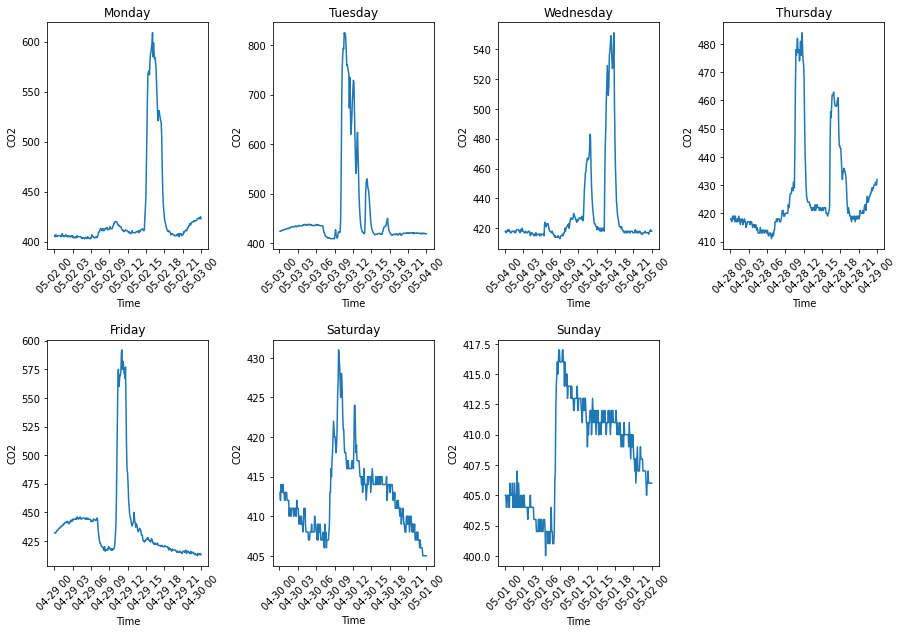

In [47]:
fig = plt.figure(figsize=(15, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

plt.subplot(2,4, 1)
plt.plot(data_mon['Time'], data_mon['CO2(ppm)'])
plt.xticks(rotation = 45)
plt.xlabel('Time')
plt.ylabel('CO2')
plt.title('Monday')

plt.subplot(2,4, 2)
plt.plot(data_tue['Time'], data_tue['CO2(ppm)'])
plt.xticks(rotation = 45)
plt.xlabel('Time')
plt.ylabel('CO2')
plt.title('Tuesday')

plt.subplot(2,4, 3)
plt.plot(data_wen['Time'], data_wen['CO2(ppm)'])
plt.xticks(rotation = 45)
plt.xlabel('Time')
plt.ylabel('CO2')
plt.title('Wednesday')

plt.subplot(2,4, 4)
plt.plot(data_thu['Time'], data_thu['CO2(ppm)'])
plt.xticks(rotation = 45)
plt.xlabel('Time')
plt.ylabel('CO2')
plt.title('Thursday')

plt.subplot(2,4, 5)
plt.plot(data_fri['Time'], data_fri['CO2(ppm)'])
plt.xticks(rotation = 45)
plt.xlabel('Time')
plt.ylabel('CO2')
plt.title('Friday')

plt.subplot(2,4, 6)
plt.plot(data_sat['Time'], data_sat['CO2(ppm)'])
plt.xticks(rotation = 45)
plt.xlabel('Time')
plt.ylabel('CO2')
plt.title('Saturday')

plt.subplot(2,4, 7)
plt.plot(data_sun['Time'], data_sun['CO2(ppm)'])
plt.xticks(rotation = 45)
plt.xlabel('Time')
plt.ylabel('CO2')
plt.title('Sunday')

Text(0.5, 1.0, 'Sunday')

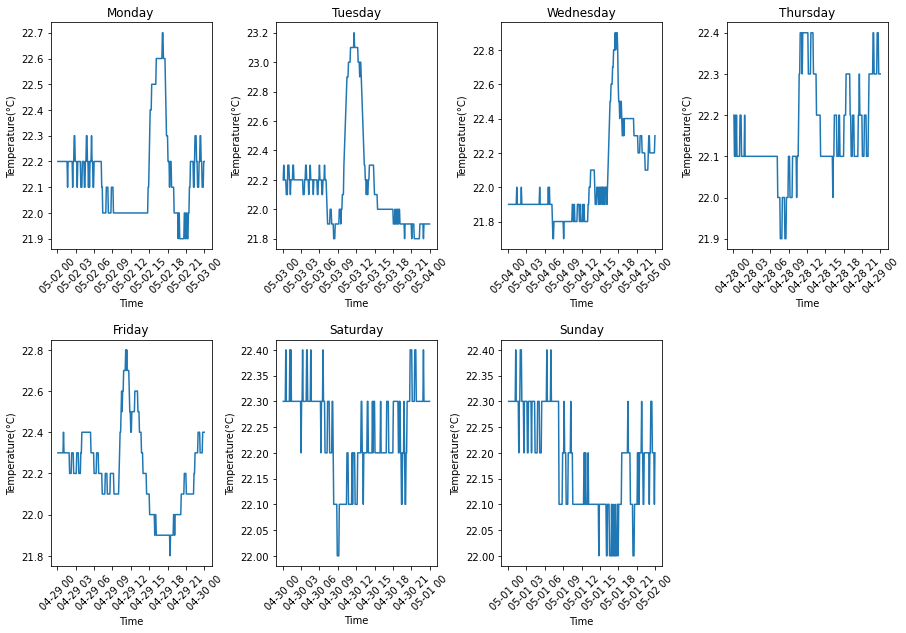

In [48]:
fig = plt.figure(figsize=(15, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

plt.subplot(2,4, 1)
plt.plot(data_mon['Time'], data_mon['Temperature(°C)'])
plt.xticks(rotation = 45)
plt.xlabel('Time')
plt.ylabel('Temperature(°C)')
plt.title('Monday')

plt.subplot(2,4, 2)
plt.plot(data_tue['Time'], data_tue['Temperature(°C)'])
plt.xticks(rotation = 45)
plt.xlabel('Time')
plt.ylabel('Temperature(°C)')
plt.title('Tuesday')

plt.subplot(2,4, 3)
plt.plot(data_wen['Time'], data_wen['Temperature(°C)'])
plt.xticks(rotation = 45)
plt.xlabel('Time')
plt.ylabel('Temperature(°C)')
plt.title('Wednesday')

plt.subplot(2,4, 4)
plt.plot(data_thu['Time'], data_thu['Temperature(°C)'])
plt.xticks(rotation = 45)
plt.xlabel('Time')
plt.ylabel('Temperature(°C)')
plt.title('Thursday')

plt.subplot(2,4, 5)
plt.plot(data_fri['Time'], data_fri['Temperature(°C)'])
plt.xticks(rotation = 45)
plt.xlabel('Time')
plt.ylabel('Temperature(°C)')
plt.title('Friday')

plt.subplot(2,4, 6)
plt.plot(data_sat['Time'], data_sat['Temperature(°C)'])
plt.xticks(rotation = 45)
plt.xlabel('Time')
plt.ylabel('Temperature(°C)')
plt.title('Saturday')

plt.subplot(2,4, 7)
plt.plot(data_sun['Time'], data_sun['Temperature(°C)'])
plt.xticks(rotation = 45)
plt.xlabel('Time')
plt.ylabel('Temperature(°C)')
plt.title('Sunday')

Text(0.5, 1.0, 'Sunday')

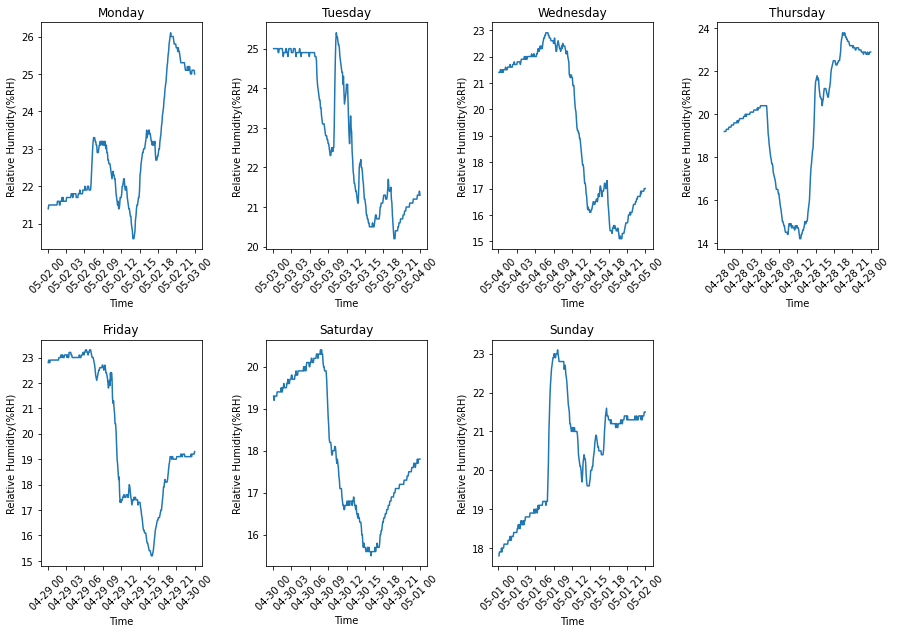

In [49]:
fig = plt.figure(figsize=(15, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

plt.subplot(2,4, 1)
plt.plot(data_mon['Time'], data_mon['Relative Humidity(%RH)'])
plt.xticks(rotation = 45)
plt.xlabel('Time')
plt.ylabel('Relative Humidity(%RH)')
plt.title('Monday')

plt.subplot(2,4, 2)
plt.plot(data_tue['Time'], data_tue['Relative Humidity(%RH)'])
plt.xticks(rotation = 45)
plt.xlabel('Time')
plt.ylabel('Relative Humidity(%RH)')
plt.title('Tuesday')

plt.subplot(2,4, 3)
plt.plot(data_wen['Time'], data_wen['Relative Humidity(%RH)'])
plt.xticks(rotation = 45)
plt.xlabel('Time')
plt.ylabel('Relative Humidity(%RH)')
plt.title('Wednesday')

plt.subplot(2,4, 4)
plt.plot(data_thu['Time'], data_thu['Relative Humidity(%RH)'])
plt.xticks(rotation = 45)
plt.xlabel('Time')
plt.ylabel('Relative Humidity(%RH)')
plt.title('Thursday')

plt.subplot(2,4, 5)
plt.plot(data_fri['Time'], data_fri['Relative Humidity(%RH)'])
plt.xticks(rotation = 45)
plt.xlabel('Time')
plt.ylabel('Relative Humidity(%RH)')
plt.title('Friday')

plt.subplot(2,4, 6)
plt.plot(data_sat['Time'], data_sat['Relative Humidity(%RH)'])
plt.xticks(rotation = 45)
plt.xlabel('Time')
plt.ylabel('Relative Humidity(%RH)')
plt.title('Saturday')

plt.subplot(2,4, 7)
plt.plot(data_sun['Time'], data_sun['Relative Humidity(%RH)'])
plt.xticks(rotation = 45)
plt.xlabel('Time')
plt.ylabel('Relative Humidity(%RH)')
plt.title('Sunday')

As it is seen, during the day CO2 and Humidity changed dramatically while temperature changed couple of degrees. Because of that and also, having usefull features of CO2 and Humidity data is a reason of using them for K-means clustering.

**Application of K-means clustering**

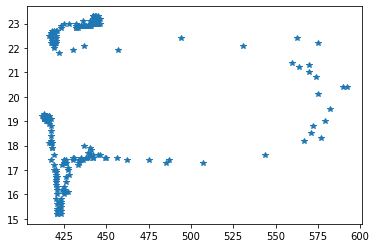

In [78]:
plt.plot(data_fri['CO2(ppm)'],data_fri['Relative Humidity(%RH)'], '*')

In [86]:
kmeans = cluster.KMeans(n_clusters = 3, init="k-means++")
kmeans = kmeans.fit(data[['CO2(ppm)','Relative Humidity(%RH)']])

In [87]:
kmeans.cluster_centers_

array([[420.97527473,  23.13946886],
       [568.8372093 ,  23.61937984],
       [772.56521739,  24.76956522]])

In [90]:
data['Clusters']= kmeans.labels_

In [93]:
data.head()

,Time,CO2(ppm),Temperature(°C),Relative Humidity(%RH),Clusters
0,2022-04-27 18:44:47,479,23.6,25.3,0
1,2022-04-27 18:49:47,462,23.4,17.8,0
2,2022-04-27 18:54:47,450,23.2,17.6,0
3,2022-04-27 18:59:47,445,23.1,17.5,0
4,2022-04-27 19:04:47,438,23.1,17.3,0


In [94]:
data[data['Clusters']==0]

,Time,CO2(ppm),Temperature(°C),Relative Humidity(%RH),Clusters
0,2022-04-27 18:44:47,479,23.6,25.3,0
1,2022-04-27 18:49:47,462,23.4,17.8,0
2,2022-04-27 18:54:47,450,23.2,17.6,0
3,2022-04-27 18:59:47,445,23.1,17.5,0
4,2022-04-27 19:04:47,438,23.1,17.3,0
...,...,...,...,...,...
3421,2022-05-09 15:49:47,424,22.1,26.3,0
3422,2022-05-09 15:54:47,431,22.2,26.7,0
3425,2022-05-09 16:09:47,454,24.2,24.0,0
3426,2022-05-09 16:14:47,448,24.8,23.3,0


In [95]:
data[data['Clusters']==1]

,Time,CO2(ppm),Temperature(°C),Relative Humidity(%RH),Clusters
475,2022-04-29 10:19:47,531,22.4,22.1,1
476,2022-04-29 10:24:47,563,22.5,22.4,1
477,2022-04-29 10:29:47,575,22.6,22.2,1
478,2022-04-29 10:34:47,560,22.5,21.4,1
479,2022-04-29 10:39:47,564,22.6,21.2,1
...,...,...,...,...,...
3364,2022-05-09 11:04:47,566,22.4,21.2,1
3365,2022-05-09 11:09:47,535,22.4,20.8,1
3366,2022-05-09 11:14:47,514,22.3,20.5,1
3367,2022-05-09 11:19:47,498,22.3,20.2,1


In [96]:
data[data['Clusters']==2]

,Time,CO2(ppm),Temperature(°C),Relative Humidity(%RH),Clusters
1625,2022-05-03 10:09:47,682,22.5,24.7,2
1626,2022-05-03 10:14:47,752,22.6,25.2,2
1627,2022-05-03 10:19:47,779,22.7,25.4,2
1628,2022-05-03 10:24:47,794,22.8,25.3,2
1629,2022-05-03 10:29:47,792,22.9,25.3,2
1630,2022-05-03 10:34:47,825,22.9,25.2,2
1631,2022-05-03 10:39:47,822,22.9,25.1,2
1632,2022-05-03 10:44:47,824,23.0,25.1,2
1633,2022-05-03 10:49:47,814,23.0,25.0,2
1634,2022-05-03 10:54:47,784,23.0,24.8,2


In the clustering, 0, 1, 2 indicate low, medium and high occupancy level respectively

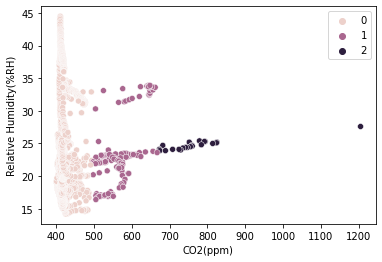

In [97]:
sns.scatterplot(data=data, x="CO2(ppm)", y = "Relative Humidity(%RH)", hue = kmeans.labels_)
plt.show()

In the belowmentioned prediction, it shows that first dataset is predicted as medium but second dataset as high level of occupancy.

In [102]:
kmeans.predict([[630, 24], [730, 26]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


array([1, 2], dtype=int32)

In [114]:
data['Prediction']=data['Clusters']
data['Prediction']=data['Prediction'].replace(0, 'low')
data['Prediction']=data['Prediction'].replace(1, 'medium')
data['Prediction']=data['Prediction'].replace(2, 'high')

In [115]:
data.head()

,Time,CO2(ppm),Temperature(°C),Relative Humidity(%RH),Clusters,Prediction
0,2022-04-27 18:44:47,479,23.6,25.3,0,low
1,2022-04-27 18:49:47,462,23.4,17.8,0,low
2,2022-04-27 18:54:47,450,23.2,17.6,0,low
3,2022-04-27 18:59:47,445,23.1,17.5,0,low
4,2022-04-27 19:04:47,438,23.1,17.3,0,low


**Saving new dataframe as CSV file**

In [116]:
data.to_csv('predicstion.csv', index=False)